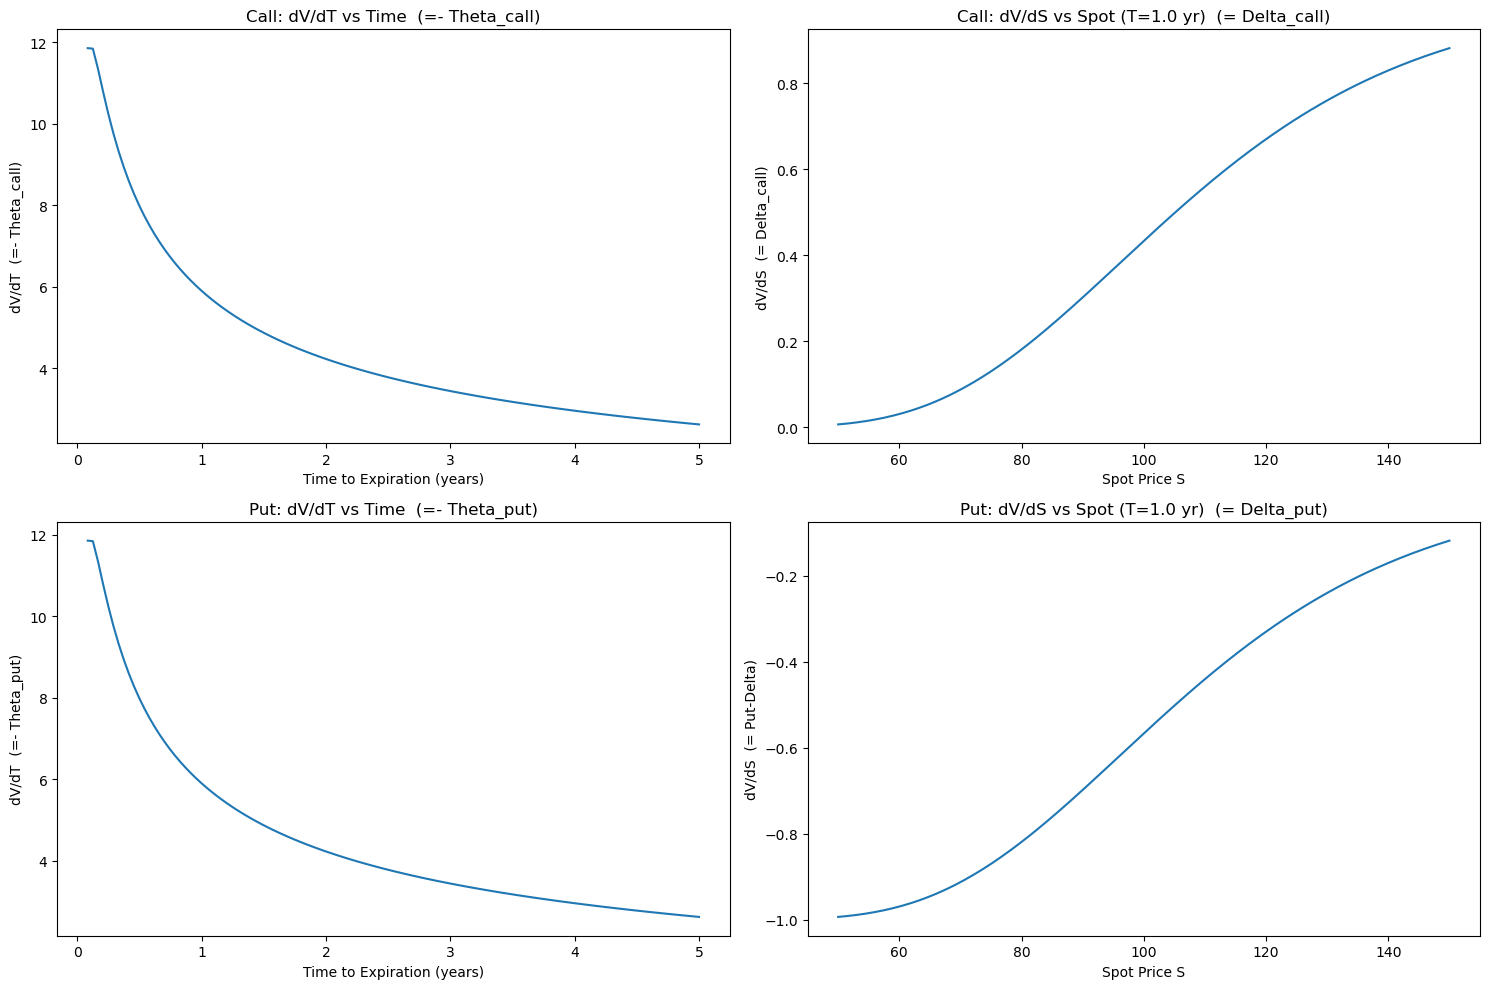

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes pricing functions for call and put
def V_call(S, K, vol, T, r=0.0):
    if T <= 0:
        return max(S - K, 0.0)
    sqrtT = np.sqrt(T)
    d1 = (np.log(S / K) + (r + 0.5*vol**2)*T) / (vol*sqrtT)
    d2 = d1 - vol*sqrtT
    return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

def V_put(S, K, vol, T, r=0.0):
    if T <= 0:
        return max(K - S, 0.0)
    sqrtT = np.sqrt(T)
    d1 = (np.log(S / K) + (r + 0.5*vol**2)*T) / (vol*sqrtT)
    d2 = d1 - vol*sqrtT
    return K*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)

# Base parameters
S0         = 100.0
K          = 110.0
volatility = 0.30
r          = 0.00
T_max      = 5.0

# Finite difference settings
times   = np.linspace(1/12, T_max, 120)
spots   = np.linspace(50, 150, 200)
T_fixed = 1.0
dT      = 1e-4
dS      = 1e-2

# Compute approximate derivatives via central difference
dVdT_call = np.array([
    (V_call(S0, K, volatility, T + dT, r)
     - V_call(S0, K, volatility, T - dT, r)) / (2*dT)
    for T in times
])

dVdT_put = np.array([
    (V_put(S0, K, volatility, T + dT, r)
     - V_put(S0, K, volatility, T - dT, r)) / (2*dT)
    for T in times
])

dVdS_call = np.array([
    (V_call(S + dS, K, volatility, T_fixed, r)
     - V_call(S - dS, K, volatility, T_fixed, r)) / (2*dS)
    for S in spots
])

dVdS_put = np.array([
    (V_put(S + dS, K, volatility, T_fixed, r)
     - V_put(S - dS, K, volatility, T_fixed, r)) / (2*dS)
    for S in spots
])

# Plot all four series, annotating relationship to Greeks
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0, 0].plot(times, dVdT_call)
ax[0, 0].set_title("Call: dV/dT vs Time  (=- Theta_call)")
ax[0, 0].set_xlabel("Time to Expiration (years)")
ax[0, 0].set_ylabel("dV/dT  (=- Theta_call)")

ax[0, 1].plot(spots, dVdS_call)
ax[0, 1].set_title(f"Call: dV/dS vs Spot (T={T_fixed} yr)  (= Delta_call)")
ax[0, 1].set_xlabel("Spot Price S")
ax[0, 1].set_ylabel("dV/dS  (= Delta_call)")

ax[1, 0].plot(times, dVdT_put)
ax[1, 0].set_title("Put: dV/dT vs Time  (=- Theta_put)")
ax[1, 0].set_xlabel("Time to Expiration (years)")
ax[1, 0].set_ylabel("dV/dT  (=- Theta_put)")

ax[1, 1].plot(spots, dVdS_put)
ax[1, 1].set_title(f"Put: dV/dS vs Spot (T={T_fixed} yr)  (= Delta_put)")
ax[1, 1].set_xlabel("Spot Price S")
ax[1, 1].set_ylabel("dV/dS  (= Put-Delta)")

plt.tight_layout()
plt.show()


### Observations

- **Call Option – Time Sensitivity ($\partial V/\partial T$):**  
  $\partial V/\partial T$ is strictly positive—extra time always raises a call’s value.  
  The lift is steep when $T$ is small (0.1 to 0.5 years) and tapers off beyond about 3 years, showing that most time value is front-loaded.  
  - *Corresponds to the Greek “Theta” (time decay, with $\Theta_{\rm call} = -\partial V/\partial T$).*

- **Call Option – Spot Price Sensitivity ($\partial V/\partial S$):**  
  Starts near zero when the call is deep out-of-the-money, rises through 0.5 at-the-money, and approaches one when the call is deep in-the-money.  
  Interpretation: far in-the-money the call moves almost one-for-one with the stock; far out-of-the-money it hardly responds to $S$.  
  - *Corresponds to the Greek “Delta” (rate of change in option value per unit change in spot, $\Delta_{\rm call} = \partial V/\partial S$).*

- **Put Option – Time Sensitivity ($\partial V/\partial T$):**  
  Same positive shape and magnitude as the call (with $r=0$, put–call parity makes their $\partial V/\partial T$ identical).  
  Extra time benefits a put because it increases the chance the stock falls farther below the strike.  
  - *Corresponds to the Greek “Theta” (time decay, with $\Theta_{\rm put} = -\partial V/\partial T$).*

- **Put Option – Spot Price Sensitivity ($\partial V/\partial S$):**  
  Mirror image of the call curve: negative everywhere, approaching $-1$ deep in-the-money and $0$ deep out-of-the-money.  
  At-the-money slope $\approx -0.5$, meaning a \$1 rise in $S$ trims about \$0.50 from the put’s value.  
  - *Corresponds to the Greek “Delta” for puts (often called “put Delta,” $\Delta_{\rm put} = \partial V/\partial S$).*


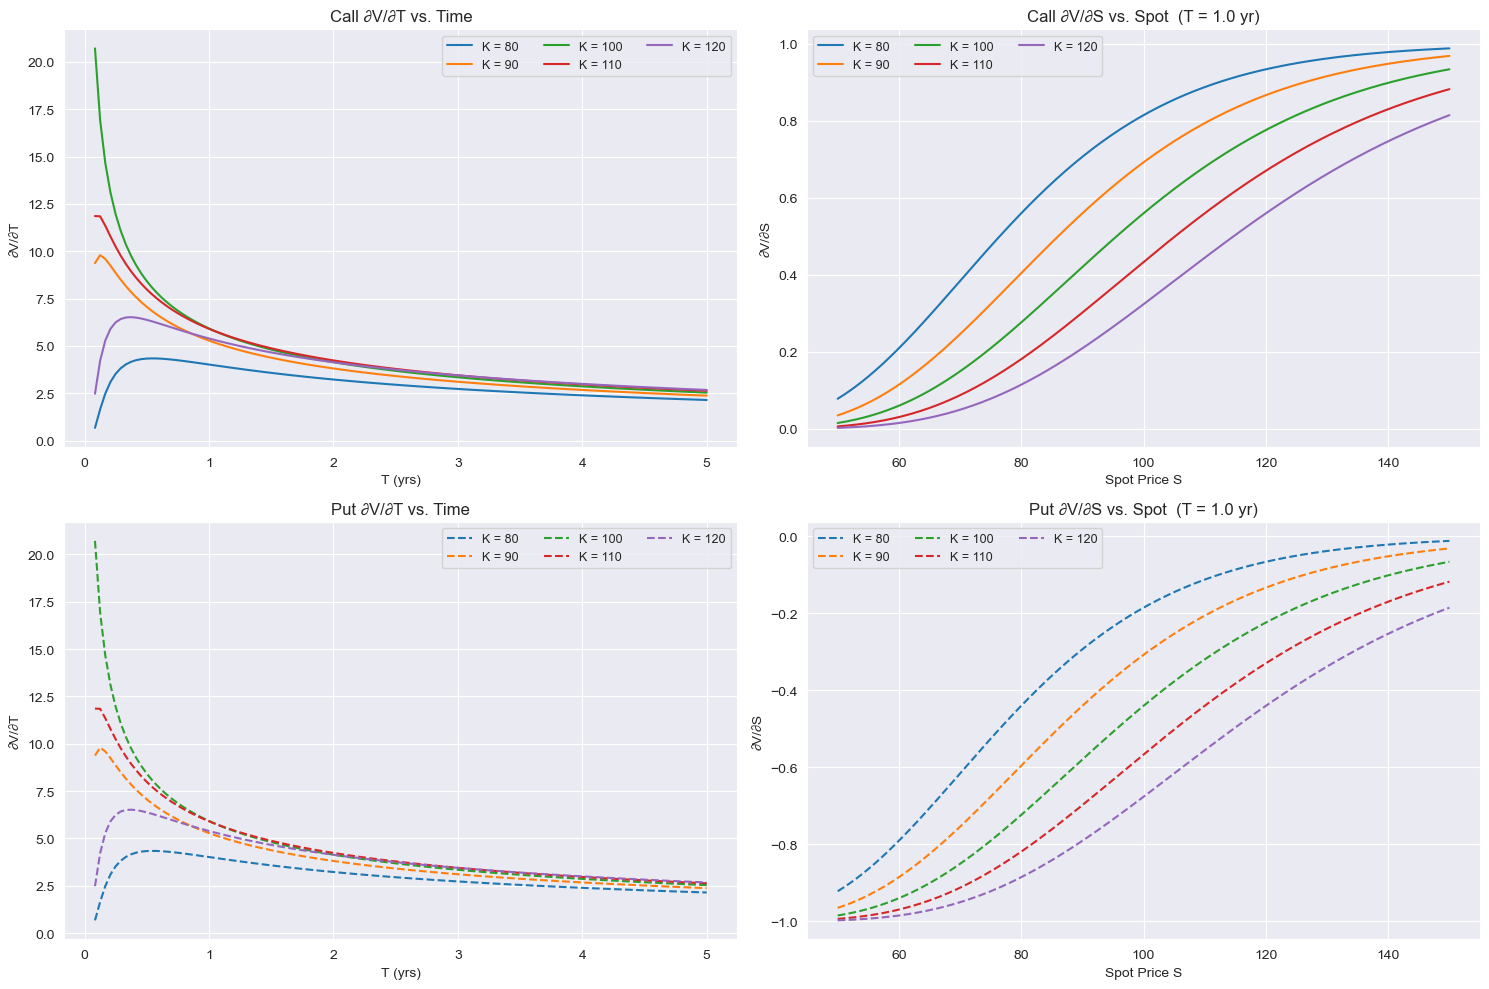

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# ------------------------------------------------------------------
# Black–Scholes pricing (no pre-built Greeks)
# ------------------------------------------------------------------
def V_call(S, K, sigma, T, r=0.0):
    """European call price."""
    if T <= 0:
        return max(S - K, 0.0)
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def V_put(S, K, sigma, T, r=0.0):
    """European put price."""
    if T <= 0:
        return max(K - S, 0.0)
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# ------------------------------------------------------------------
# Common parameters
# ------------------------------------------------------------------
S0     = 100.0           # reference spot for ∂V/∂T
sigma  = 0.30            # annual volatility
r      = 0.0             # risk-free rate
T_max  = 5.0             # longest maturity (years)

times   = np.linspace(1/12, T_max, 120)    # grid for ∂V/∂T
spots   = np.linspace(50, 150, 200)        # grid for ∂V/∂S
T_fixed = 1.0                              # maturity slice for ∂V/∂S curves
dT, dS  = 1e-4, 1e-2                       # finite-difference steps

strike_list = [80, 90, 100, 110, 120]      # five strikes
cmap   = plt.get_cmap("tab10")             # automatic colour palette
colours = [cmap(i % 10) for i in range(len(strike_list))]

# ------------------------------------------------------------------
# Finite-difference derivatives for each strike
# ------------------------------------------------------------------
results = {}
for K, c in zip(strike_list, colours):
    # ∂V/∂T (call & put) around S0
    dVdT_call = np.array([
        (V_call(S0, K, sigma, T + dT, r) - V_call(S0, K, sigma, T - dT, r))
        / (2*dT) for T in times
    ])
    dVdT_put  = np.array([
        (V_put(S0, K, sigma, T + dT, r) - V_put(S0, K, sigma, T - dT, r))
        / (2*dT) for T in times
    ])
    # ∂V/∂S (call & put) at fixed maturity
    dVdS_call = np.array([
        (V_call(S + dS, K, sigma, T_fixed, r) - V_call(S - dS, K, sigma, T_fixed, r))
        / (2*dS) for S in spots
    ])
    dVdS_put  = np.array([
        (V_put(S + dS, K, sigma, T_fixed, r) - V_put(S - dS, K, sigma, T_fixed, r))
        / (2*dS) for S in spots
    ])
    results[K] = dict(colour=c,
                      dVdT_call=dVdT_call, dVdT_put=dVdT_put,
                      dVdS_call=dVdS_call, dVdS_put=dVdS_put)

# ------------------------------------------------------------------
# Plot four panels
# ------------------------------------------------------------------
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

for K in strike_list:
    c = results[K]["colour"]
    # (a) Call ∂V/∂T
    ax[0, 0].plot(times, results[K]["dVdT_call"], color=c, label=f"K = {K}")
    # (b) Call ∂V/∂S
    ax[0, 1].plot(spots, results[K]["dVdS_call"], color=c, label=f"K = {K}")
    # (c) Put ∂V/∂T  (dashed)
    ax[1, 0].plot(times, results[K]["dVdT_put"],  ls="--", color=c, label=f"K = {K}")
    # (d) Put ∂V/∂S  (dashed)
    ax[1, 1].plot(spots, results[K]["dVdS_put"],  ls="--", color=c, label=f"K = {K}")

# Titles and axis labels
ax[0, 0].set(title="Call ∂V/∂T vs. Time", xlabel="T (yrs)", ylabel="∂V/∂T")
ax[0, 1].set(title=f"Call ∂V/∂S vs. Spot  (T = {T_fixed} yr)",
             xlabel="Spot Price S", ylabel="∂V/∂S")
ax[1, 0].set(title="Put ∂V/∂T vs. Time", xlabel="T (yrs)", ylabel="∂V/∂T")
ax[1, 1].set(title=f"Put ∂V/∂S vs. Spot  (T = {T_fixed} yr)",
             xlabel="Spot Price S", ylabel="∂V/∂S")

# Legends
for a in ax.ravel():
    a.legend(ncol=3, fontsize=9)

plt.tight_layout()
plt.show()


### An Observation

We see that the curves seem to match really well top to bottom. This is not by accident!

### Put–Call Parity

For a non-dividend European option with strike \(K\), maturity \(T\), and
risk-free rate \(r\):

$$
C(S,K,T)\;-\;P(S,K,T)\;=\;S\;-\;K\,e^{-rT}.
$$

---

### Special case \(r = 0\)

With zero interest:

$$
C - P = S - K.
$$

---

### Calculus consequences (seen in the plots)

* **Time derivative**

  $$
  \frac{\partial C}{\partial T} \;-\;\frac{\partial P}{\partial T} = 0
  \quad\Longrightarrow\quad
  \boxed{\;\frac{\partial C}{\partial T} \;=\;\frac{\partial P}{\partial T}\;}.
  $$

* **Spot-price derivative**

  $$
  \frac{\partial C}{\partial S} \;-\;\frac{\partial P}{\partial S} = 1
  \quad\Longrightarrow\quad
  \boxed{\;\frac{\partial C}{\partial S} \;=\;\frac{\partial P}{\partial S} + 1\;}.
  $$

These two equalities are exactly what the time-slope and spot-slope
graphs reveal for every strike.

### Put–Call Parity and its Derivatives

$$ C - P = S - K e^{-rT} $$

Time derivative  
$$ \frac{\partial C}{\partial T} - \frac{\partial P}{\partial T} = rK e^{-rT} $$

Spot derivative  
$$ \frac{\partial C}{\partial S} - \frac{\partial P}{\partial S} = 1 $$

When $r=0$ these reduce to

* $\partial C/\partial T = \partial P/\partial T$
* $\partial C/\partial S = \partial P/\partial S + 1$

exactly matching the current plots; the next cell tests $r\neq0$.


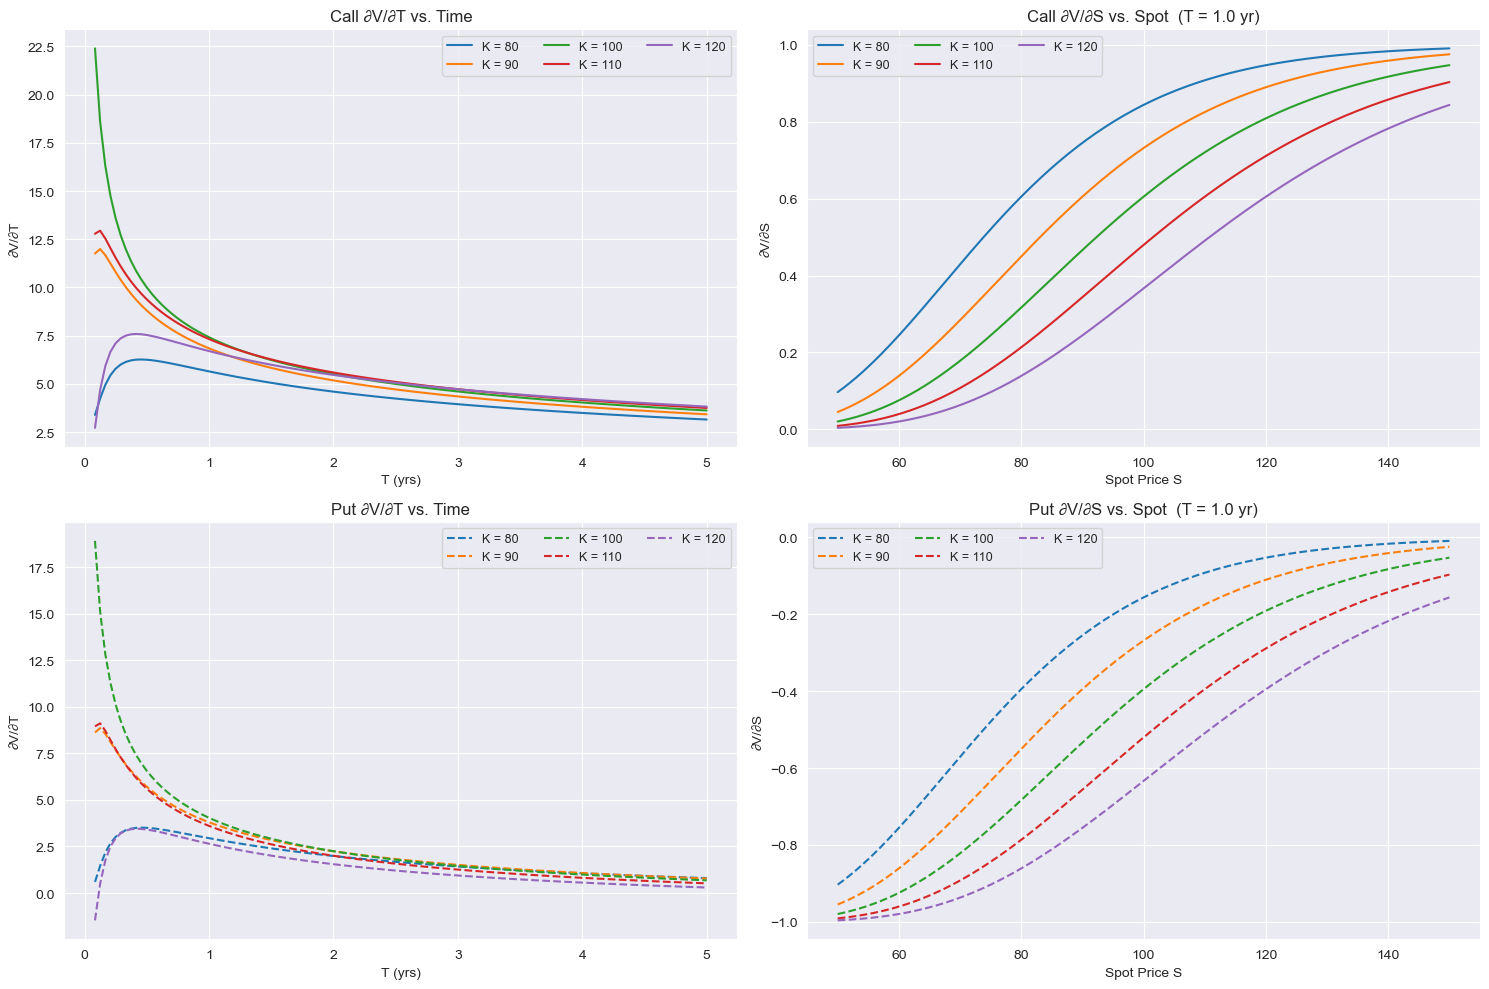

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# ------------------------------------------------------------------
# Black–Scholes pricing (no pre-built Greeks)
# ------------------------------------------------------------------
def V_call(S, K, sigma, T, r=0.0):
    """European call price."""
    if T <= 0:
        return max(S - K, 0.0)
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def V_put(S, K, sigma, T, r=0.0):
    """European put price."""
    if T <= 0:
        return max(K - S, 0.0)
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# ------------------------------------------------------------------
# Common parameters
# ------------------------------------------------------------------
S0     = 100.0           # reference spot for ∂V/∂T
sigma  = 0.30            # annual volatility
r      = 0.035            # risk-free rate
T_max  = 5.0             # longest maturity (years)

times   = np.linspace(1/12, T_max, 120)    # grid for ∂V/∂T
spots   = np.linspace(50, 150, 200)        # grid for ∂V/∂S
T_fixed = 1.0                              # maturity slice for ∂V/∂S curves
dT, dS  = 1e-4, 1e-2                       # finite-difference steps

strike_list = [80, 90, 100, 110, 120]      # five strikes
cmap   = plt.get_cmap("tab10")             # automatic colour palette
colours = [cmap(i % 10) for i in range(len(strike_list))]

# ------------------------------------------------------------------
# Finite-difference derivatives for each strike
# ------------------------------------------------------------------
results = {}
for K, c in zip(strike_list, colours):
    # ∂V/∂T (call & put) around S0
    dVdT_call = np.array([
        (V_call(S0, K, sigma, T + dT, r) - V_call(S0, K, sigma, T - dT, r))
        / (2*dT) for T in times
    ])
    dVdT_put  = np.array([
        (V_put(S0, K, sigma, T + dT, r) - V_put(S0, K, sigma, T - dT, r))
        / (2*dT) for T in times
    ])
    # ∂V/∂S (call & put) at fixed maturity
    dVdS_call = np.array([
        (V_call(S + dS, K, sigma, T_fixed, r) - V_call(S - dS, K, sigma, T_fixed, r))
        / (2*dS) for S in spots
    ])
    dVdS_put  = np.array([
        (V_put(S + dS, K, sigma, T_fixed, r) - V_put(S - dS, K, sigma, T_fixed, r))
        / (2*dS) for S in spots
    ])
    results[K] = dict(colour=c,
                      dVdT_call=dVdT_call, dVdT_put=dVdT_put,
                      dVdS_call=dVdS_call, dVdS_put=dVdS_put)

# ------------------------------------------------------------------
# Plot four panels
# ------------------------------------------------------------------
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

for K in strike_list:
    c = results[K]["colour"]
    # (a) Call ∂V/∂T
    ax[0, 0].plot(times, results[K]["dVdT_call"], color=c, label=f"K = {K}")
    # (b) Call ∂V/∂S
    ax[0, 1].plot(spots, results[K]["dVdS_call"], color=c, label=f"K = {K}")
    # (c) Put ∂V/∂T  (dashed)
    ax[1, 0].plot(times, results[K]["dVdT_put"],  ls="--", color=c, label=f"K = {K}")
    # (d) Put ∂V/∂S  (dashed)
    ax[1, 1].plot(spots, results[K]["dVdS_put"],  ls="--", color=c, label=f"K = {K}")

# Titles and axis labels
ax[0, 0].set(title="Call ∂V/∂T vs. Time", xlabel="T (yrs)", ylabel="∂V/∂T")
ax[0, 1].set(title=f"Call ∂V/∂S vs. Spot  (T = {T_fixed} yr)",
             xlabel="Spot Price S", ylabel="∂V/∂S")
ax[1, 0].set(title="Put ∂V/∂T vs. Time", xlabel="T (yrs)", ylabel="∂V/∂T")
ax[1, 1].set(title=f"Put ∂V/∂S vs. Spot  (T = {T_fixed} yr)",
             xlabel="Spot Price S", ylabel="∂V/∂S")

# Legends
for a in ax.ravel():
    a.legend(ncol=3, fontsize=9)

plt.tight_layout()
plt.show()


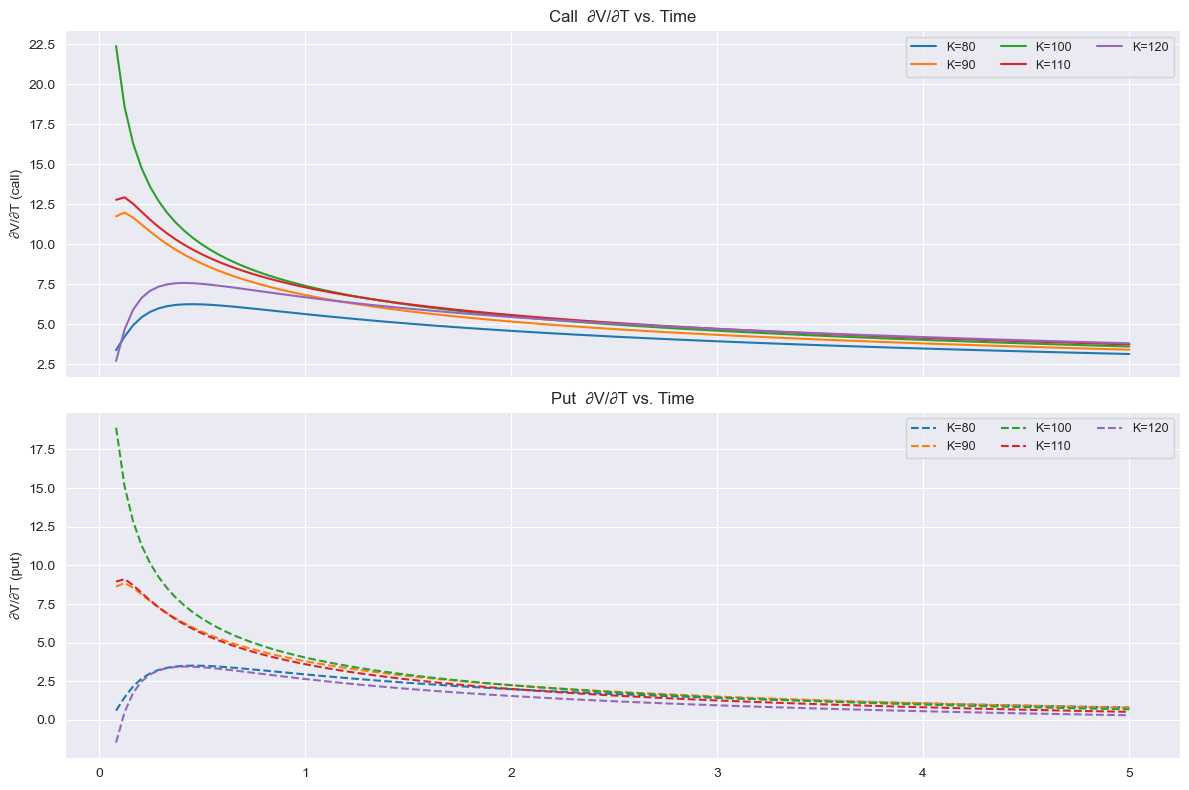

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# ------------------------------------------------------------
# Black–Scholes pricing (no ready-made Greeks)
# ------------------------------------------------------------
def V_call(S, K, sigma, T, r=0.0):
    if T <= 0:
        return max(S - K, 0.0)
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def V_put(S, K, sigma, T, r=0.0):
    if T <= 0:
        return max(K - S, 0.0)
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# ------------------------------------------------------------
# Parameters
# ------------------------------------------------------------
S0     = 100.0
sigma  = 0.30
r      = 0.035         # non-zero rate
T_max  = 5.0

times   = np.linspace(1/12, T_max, 120)
dT      = 1e-4

strike_list = [80, 90, 100, 110, 120]
cmap        = plt.get_cmap("tab10")
colours     = [cmap(i % 10) for i in range(len(strike_list))]

# ------------------------------------------------------------
# Derivatives and gap
# ------------------------------------------------------------
results = {}
for K, c in zip(strike_list, colours):
    dC_dT = np.array([(V_call(S0, K, sigma, T + dT, r) -
                       V_call(S0, K, sigma, T - dT, r)) / (2*dT)
                      for T in times])
    dP_dT = np.array([(V_put(S0, K, sigma, T + dT, r) -
                       V_put(S0, K, sigma, T - dT, r)) / (2*dT)
                      for T in times])

    results[K] = dict(
        colour=c,
        call=dC_dT,
        put=dP_dT,
        gap=dC_dT - dP_dT,
        rhs=r * K * np.exp(-r * times)
    )

# ------------------------------------------------------------
# Plot
# ------------------------------------------------------------
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# 1. Call ∂V/∂T
for K in strike_list:
    c = results[K]["colour"]
    ax[0].plot(times, results[K]["call"], color=c, label=f"K={K}")
ax[0].set(title="Call  ∂V/∂T vs. Time", ylabel="∂V/∂T (call)")
ax[0].legend(ncol=3, fontsize=9)

# 2. Put ∂V/∂T
for K in strike_list:
    c = results[K]["colour"]
    ax[1].plot(times, results[K]["put"], ls="--", color=c, label=f"K={K}")
ax[1].set(title="Put  ∂V/∂T vs. Time", ylabel="∂V/∂T (put)")
ax[1].legend(ncol=3, fontsize=9)



plt.tight_layout()
plt.show()

Although the curves no longer coincide point-for-point, the gap between them consistently follows an exponential trend.

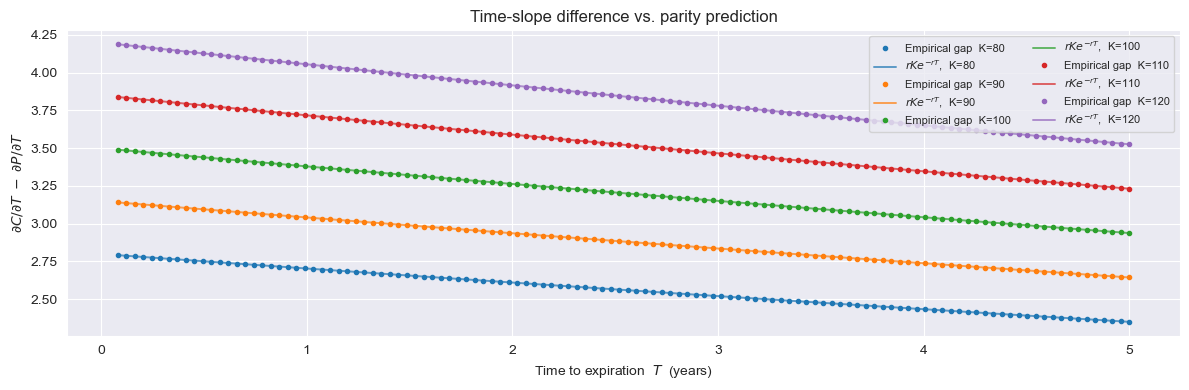

In [92]:
# ------------------------------------------------------------
# Solo “gap” plot
#   ∂C/∂T − ∂P/∂T  (dots)  vs.  r K e^{-rT}  (solid line)
# ------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12,4))

for K in strike_list:
    c = results[K]["colour"]
    ax.plot(times, results[K]["gap"],
            marker="o", ms=3, ls="None",  color=c,
            label=f"Empirical gap  K={K}")
    ax.plot(times, results[K]["rhs"],
            ls="-", lw=1.4, color=c, alpha=0.7,
            label=rf"$r K e^{{-rT}}$,  K={K}")

ax.set(
    title="Time-slope difference vs. parity prediction",
    xlabel="Time to expiration  $T$  (years)",
    ylabel=r"$\partial C/\partial T\;-\;\partial P/\partial T$"
)
ax.legend(ncol=2, fontsize=8)
plt.tight_layout()
plt.show()

## The “Big 5” Option Greeks

Traders use these five primary sensitivities—known as the “Greeks”—to quantify and hedge the key dimensions of risk:

| Greek   | Definition                              | Hedging Use Case                                              |
|:--------|:----------------------------------------|:--------------------------------------------------------------|
| **Delta**  | $\displaystyle \frac{\partial V}{\partial S}$<br>Rate of change in option value per \$1 move in the underlying. | **Delta hedging:** Hold a position in the underlying (or futures) that offsets your net delta, locking in a delta‐neutral stance so small stock moves do not alter the portfolio’s value. |
| **Gamma**  | $\displaystyle \frac{\partial^2 V}{\partial S^2}$<br>Rate of change of delta itself as the stock moves. | **Gamma scalping:** Continuously re‐hedge delta‐neutral positions to capture P&L from gamma when the underlying oscillates. High gamma means large P&L from small swings. |
| **Theta**  | $-\displaystyle \frac{\partial V}{\partial T}$<br>Time decay, or how much option value erodes per day as expiry approaches. | **Theta capture:** Sell time decay by writing (short) options when implied volatility is rich—earning the premium as the option loses extrinsic value each day. |
| **Vega**   | $\displaystyle \frac{\partial V}{\partial \sigma}$<br>Sensitivity to a 1‐point move in implied volatility. | **Vega hedging:** Use offsetting option positions (e.g. calendar spreads, variance swaps) to neutralize your net vega exposure when you want to avoid volatility‐driven P&L. |
| **Rho**    | $\displaystyle \frac{\partial V}{\partial r}$<br>Sensitivity to a 1‐point move in the risk‐free rate. | **Rho hedging:** Rarely used for short‐dated options, but for long‐dated (LEAPS) or in fixed‐income context, traders may use interest‐rate swaps or bonds to offset large rho exposure. |

### Why Hedge the Greeks?

- **Limit P&L swings**: By neutralizing one dimension of risk (delta, vega, etc.), you isolate your view (e.g., on volatility or time decay) and prevent unwanted moves in other factors from overwhelming your position.  
- **Structured strategies**: Combinations like butterfly (gamma) or calendar spreads (vega) layer multiple Greeks to fine‐tune risk/return profiles.  
- **Dynamic management**: Greeks change as market conditions evolve—active hedging (e.g. gamma scalping) lets you lock in small gains over time.

Mastering these five sensitivities is the foundation of professional options trading, enabling precise control over complex, multi‐leg portfolios.


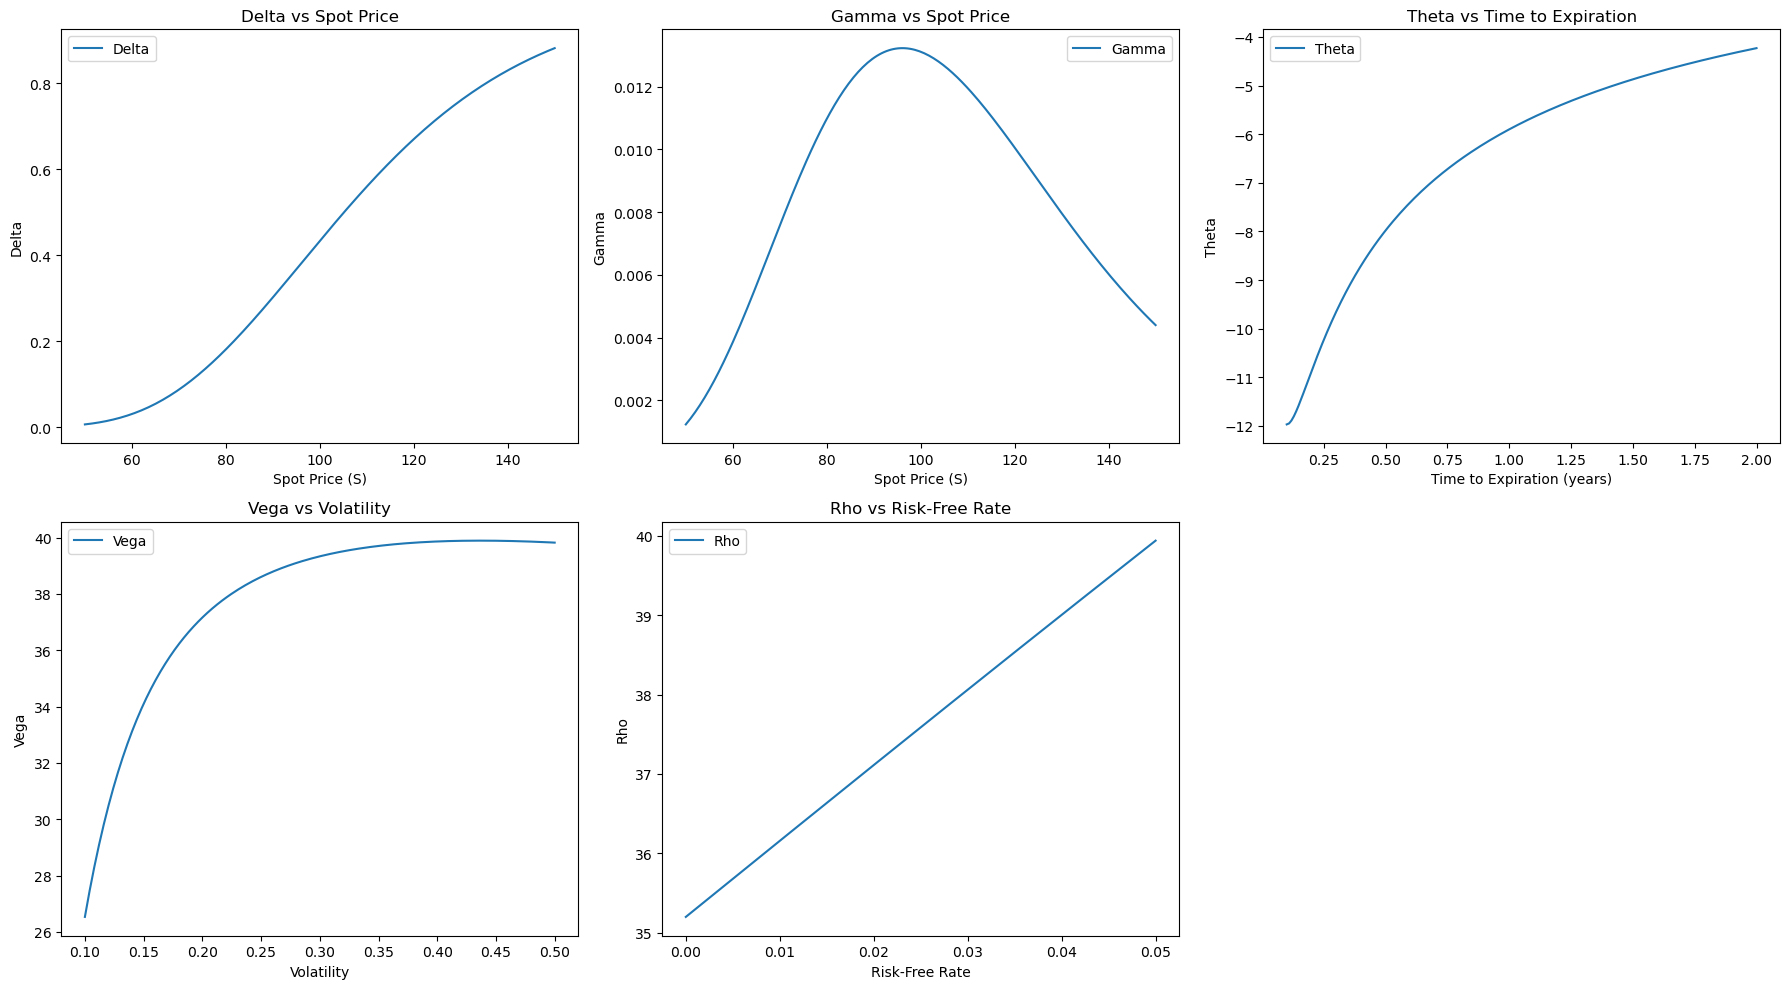

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# ------------------------------------------------------------
# Black-Scholes call pricing function
# ------------------------------------------------------------
def V_call(S, K, vol, T, r=0.0):
    if T <= 0:
        return max(S - K, 0.0)
    sqrtT = np.sqrt(T)
    d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * sqrtT)
    d2 = d1 - vol * sqrtT
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# ------------------------------------------------------------
# Base parameters
# ------------------------------------------------------------
S0      = 100.0    # reference spot price
K       = 110.0    # strike price
vol0    = 0.30     # reference volatility
r0      = 0.00     # reference risk-free rate
T_fixed = 1.0      # one-year to expiration

# ------------------------------------------------------------
# Finite-difference increments
# ------------------------------------------------------------
dS = 1e-2    # for Delta and Gamma
dT = 1e-4    # for Theta
dV = 1e-4    # for Vega
dr = 1e-4    # for Rho

# ------------------------------------------------------------
# Grids for plotting
# ------------------------------------------------------------
S_grid   = np.linspace(50, 150, 200)   # for Delta & Gamma
T_grid   = np.linspace(0.1, 2.0, 200)  # for Theta
vol_grid = np.linspace(0.1, 0.5, 200)  # for Vega
r_grid   = np.linspace(0.0, 0.05, 200) # for Rho

# ------------------------------------------------------------
# Compute Greeks via finite differences
# ------------------------------------------------------------
delta = np.array([
    (V_call(S + dS, K, vol0, T_fixed, r0)
     - V_call(S - dS, K, vol0, T_fixed, r0)) / (2 * dS)
    for S in S_grid
])

gamma = np.array([
    (V_call(S + dS, K, vol0, T_fixed, r0)
     - 2 * V_call(S,     K, vol0, T_fixed, r0)
     + V_call(S - dS, K, vol0, T_fixed, r0)) / (dS ** 2)
    for S in S_grid
])

theta = np.array([
    -(
        V_call(S0, K, vol0, T + dT, r0)
      - V_call(S0, K, vol0, T - dT, r0)
    ) / (2 * dT)
    for T in T_grid
])

vega = np.array([
    (V_call(S0, K, vol_grid[idx] + dV, T_fixed, r0)
     - V_call(S0, K, vol_grid[idx] - dV, T_fixed, r0)) / (2 * dV)
    for idx in range(len(vol_grid))
])

rho = np.array([
    (V_call(S0, K, vol0, T_fixed, r_grid[idx] + dr)
     - V_call(S0, K, vol0, T_fixed, r_grid[idx] - dr)) / (2 * dr)
    for idx in range(len(r_grid))
])

# ------------------------------------------------------------
# Plot the Big 5 Greeks with labels
# ------------------------------------------------------------
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Delta
axes[0].plot(S_grid, delta, label="Delta")
axes[0].set_title("Delta vs Spot Price")
axes[0].set_xlabel("Spot Price (S)")
axes[0].set_ylabel("Delta")
axes[0].legend()

# Gamma
axes[1].plot(S_grid, gamma, label="Gamma")
axes[1].set_title("Gamma vs Spot Price")
axes[1].set_xlabel("Spot Price (S)")
axes[1].set_ylabel("Gamma")
axes[1].legend()

# Theta
axes[2].plot(T_grid, theta, label="Theta")
axes[2].set_title("Theta vs Time to Expiration")
axes[2].set_xlabel("Time to Expiration (years)")
axes[2].set_ylabel("Theta")
axes[2].legend()

# Vega
axes[3].plot(vol_grid, vega, label="Vega")
axes[3].set_title("Vega vs Volatility")
axes[3].set_xlabel("Volatility")
axes[3].set_ylabel("Vega")
axes[3].legend()

# Rho
axes[4].plot(r_grid, rho, label="Rho")
axes[4].set_title("Rho vs Risk-Free Rate")
axes[4].set_xlabel("Risk-Free Rate")
axes[4].set_ylabel("Rho")
axes[4].legend()

# Hide unused subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()


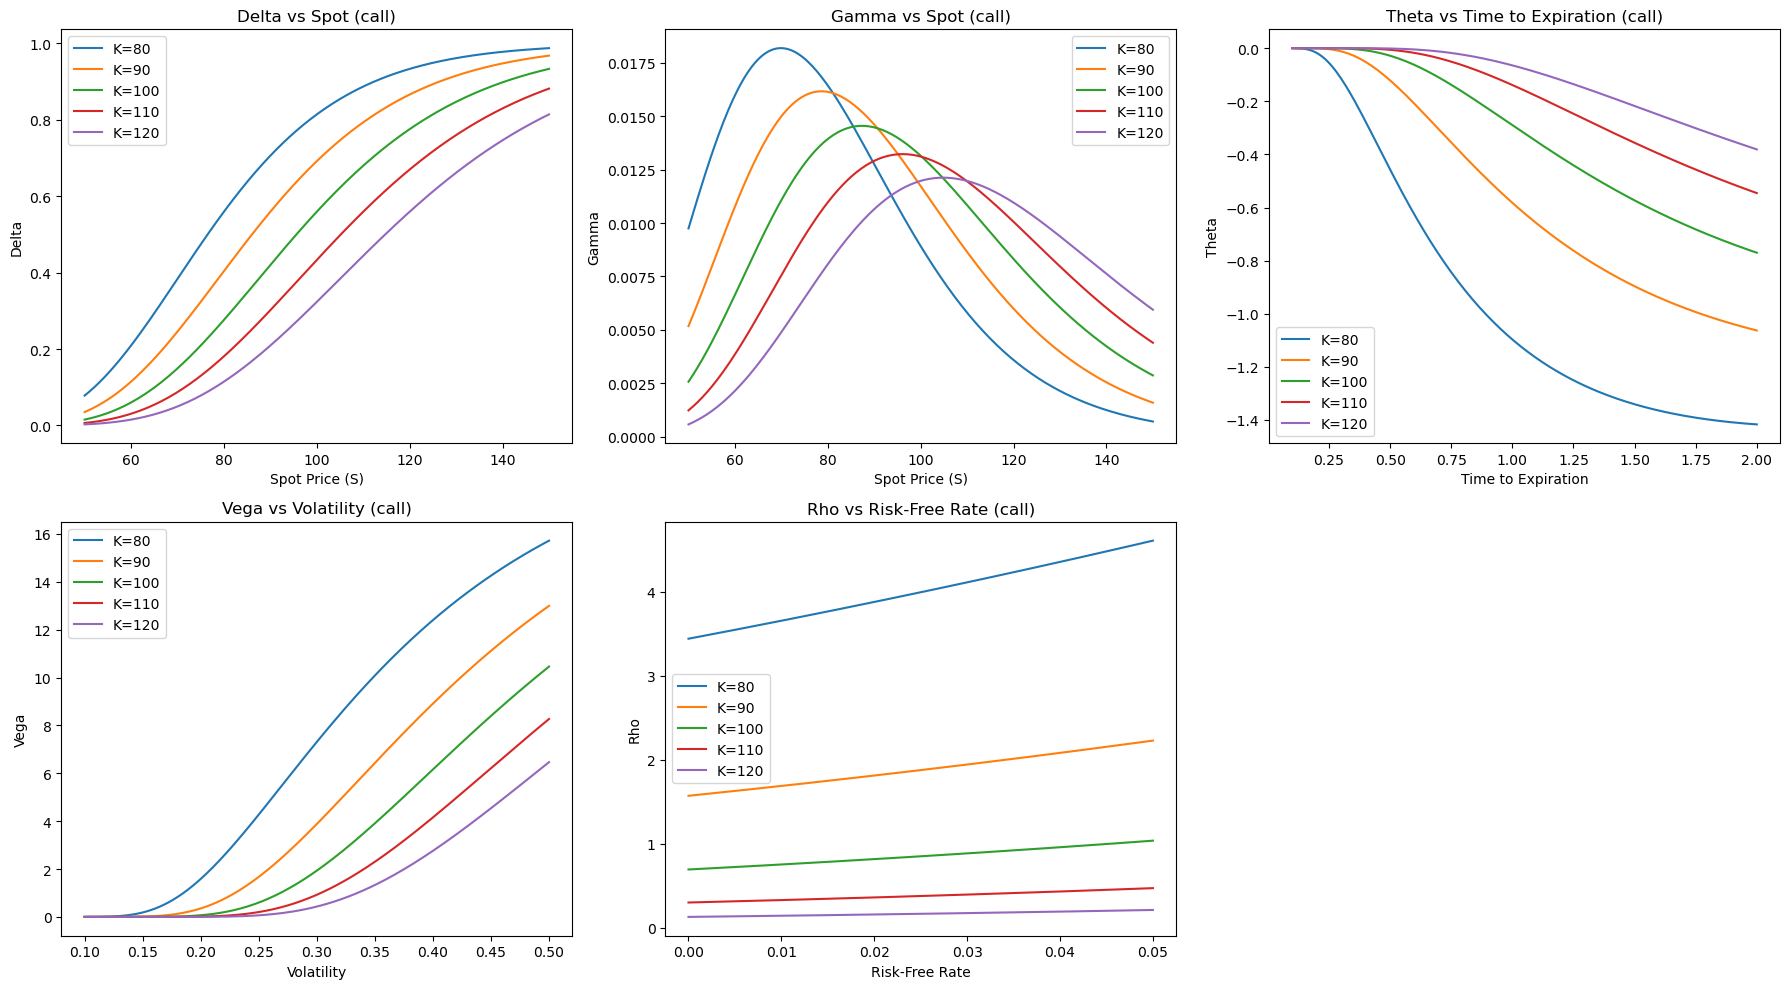

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# ------------------------------------------------------------
# Black-Scholes call pricing function
# ------------------------------------------------------------
def V_call(S, K, vol, T, r=0.0):
    if T <= 0:
        return max(S - K, 0.0)
    sqrtT = np.sqrt(T)
    d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * sqrtT)
    d2 = d1 - vol * sqrtT
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# ------------------------------------------------------------
# Base parameters
# ------------------------------------------------------------
vol0    = 0.30     # reference volatility
r0      = 0.00     # reference risk-free rate
T_fixed = 1.0      # one-year to expiration

# ------------------------------------------------------------
# Finite-difference increments
# ------------------------------------------------------------
dS = 1e-2    # for Delta and Gamma
dT = 1e-4    # for Theta
dV = 1e-4    # for Vega
dr = 1e-4    # for Rho

# ------------------------------------------------------------
# Grids for plotting
# ------------------------------------------------------------
S_grid   = np.linspace(50, 150, 200)   # for Delta & Gamma
T_grid   = np.linspace(0.1, 2.0, 200)  # for Theta
vol_grid = np.linspace(0.1, 0.5, 200)  # for Vega
r_grid   = np.linspace(0.0, 0.05, 200) # for Rho

# ------------------------------------------------------------
# Strike levels to compare
# ------------------------------------------------------------
K_list = [80, 90, 100, 110, 120]

# ------------------------------------------------------------
# Plot each Greek with multiple strike curves
# ------------------------------------------------------------
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# a) Delta vs Spot (call)
for K in K_list:
    delta = np.array([
        (V_call(S + dS, K, vol0, T_fixed, r0)
         - V_call(S - dS, K, vol0, T_fixed, r0)) / (2 * dS)
        for S in S_grid
    ])
    axes[0].plot(S_grid, delta, label=f"K={K}")
axes[0].set_title("Delta vs Spot (call)")
axes[0].set_xlabel("Spot Price (S)")
axes[0].set_ylabel("Delta")
axes[0].legend()

# b) Gamma vs Spot (call)
for K in K_list:
    gamma = np.array([
        (V_call(S + dS, K, vol0, T_fixed, r0)
         - 2*V_call(S, K, vol0, T_fixed, r0)
         + V_call(S - dS, K, vol0, T_fixed, r0)) / (dS**2)
        for S in S_grid
    ])
    axes[1].plot(S_grid, gamma, label=f"K={K}")
axes[1].set_title("Gamma vs Spot (call)")
axes[1].set_xlabel("Spot Price (S)")
axes[1].set_ylabel("Gamma")
axes[1].legend()

# c) Theta vs Time to Expiration (call)
for K in K_list:
    theta = np.array([
        -(
            V_call(S_grid[0], K, vol0, T + dT, r0)
          - V_call(S_grid[0], K, vol0, T - dT, r0)
        ) / (2 * dT)
        for T in T_grid
    ])
    axes[2].plot(T_grid, theta, label=f"K={K}")
axes[2].set_title("Theta vs Time to Expiration (call)")
axes[2].set_xlabel("Time to Expiration")
axes[2].set_ylabel("Theta")
axes[2].legend()

# d) Vega vs Volatility (call)
for K in K_list:
    vega = np.array([
        (V_call(S_grid[0], K, vol + dV, T_fixed, r0)
         - V_call(S_grid[0], K, vol - dV, T_fixed, r0)) / (2 * dV)
        for vol in vol_grid
    ])
    axes[3].plot(vol_grid, vega, label=f"K={K}")
axes[3].set_title("Vega vs Volatility (call)")
axes[3].set_xlabel("Volatility")
axes[3].set_ylabel("Vega")
axes[3].legend()

# e) Rho vs Risk-Free Rate (call)
for K in K_list:
    rho = np.array([
        (V_call(S_grid[0], K, vol0, T_fixed, r + dr)
         - V_call(S_grid[0], K, vol0, T_fixed, r - dr)) / (2 * dr)
        for r in r_grid
    ])
    axes[4].plot(r_grid, rho, label=f"K={K}")
axes[4].set_title("Rho vs Risk-Free Rate (call)")
axes[4].set_xlabel("Risk-Free Rate")
axes[4].set_ylabel("Rho")
axes[4].legend()

# Hide unused subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()


## Insights from the “Big 5” Greeks Across Strikes (Calls)

### 1. Delta vs Spot
- **Shape:** S-curves rising from 0 toward 1 as spot \(S\) increases.
- **Strike dependence:**  
  - Lower strikes (K=80, 90) have deltas starting closer to 1 even when \(S=50\).  
  - At-the-money (K=100) delta crosses 0.5 near \(S\approx100\).  
  - Higher strikes (K=110, 120) shift the curve rightward—delta remains small until \(S\) nears the strike.

---

### 2. Gamma vs Spot
- **Shape:** Unimodal peaks indicating where the option is most sensitive to spot curvature.
- **Strike dependence:**  
  - Peak gamma occurs when \(S \approx K\).  
  - Lower-K options peak left of 100 (e.g.\ around 80), higher-K options peak further right.  
  - Peak heights decrease for deep in- or out-of-the-money strikes (gamma is largest when the option is at-the-money).

---

### 3. Theta vs Time to Expiration
- **Shape:** Theta is negative and its magnitude grows as time to expiration \(T\) shrinks.
- **Strike dependence:**  
  - Deep-in-the-money calls (K=80, 90) lose value fastest as expiry approaches (most negative theta).  
  - At-the-money (K=100) is next fastest.  
  - Out-of-the-money (K=110, 120) lose time value more slowly (theta magnitude is smaller).

---

### 4. Vega vs Volatility
- **Shape:** Convex, rising vega as implied volatility increases.
- **Strike dependence:**  
  - Deep-in-the-money options (K=80, 90) exhibit the highest vega across the vol range.  
  - At-the-money (K=100) is slightly lower, and out-of-the-money (K=110, 120) have the lowest vega at a given vol.  
  - All curves accelerate upward as vol increases, reflecting greater sensitivity in high-vol regimes.

---

### 5. Rho vs Risk-Free Rate
- **Shape:** Approximately linear increase in rho as the rate \(r\) rises.
- **Strike dependence:**  
  - Deep-in-the-money calls (K=80, 90) have the largest rho.  
  - At-the-money (K=100) is moderate.  
  - Out-of-the-money (K=110, 120) rho is smallest.  
  - Since calls gain value when rates rise (future strike is discounted less), deeper-in-the-money options benefit most.

---

**Summary:**  
- **Delta** and **Gamma** concentrate their action around \(S \approx K\).  
- **Theta** decay is strongest for deep-in-the-money as expiry nears.  
- **Vega** is highest for deep-in-the-money and amplifies in high-vol environments.  
- **Rho** grows linearly with rate and is largest for low-strike calls.  